
**Part 1:** **Data** **Preparation** **and** **Cleaning**
1. **Dataset Overview:**

*   Load the dataset and display its shape, columns, and data types



In [224]:
import numpy as np #importing panda
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplot library
import seaborn as sns #importing seaborn
#Loading dataset
data=pd.read_csv("/content/Calgary_Emergency_Shelters_Daily_Occupancy.csv")
data

,Date,YEAR,MONTH,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime
0,2013/04/01,2013,Apr,Calgary,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,725.0,700,NaN
1,2013/04/01,2013,Apr,Calgary,Winter Emergency,River Front - Winter Emergency,Calgary Drop-In Centre,River Front - Winter Emergency,140.0,90,NaN
2,2013/04/01,2013,Apr,Calgary,Transitional,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,270.0,262,NaN
3,2013/04/01,2013,Apr,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,125.0,117,NaN
4,2013/04/01,2013,Apr,Calgary,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),23.0,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...
76422,2024/10/31,2024,Oct,Calgary,COVID19 Expanded Shelter,Alpha House Mustard Seed Acquisition,Alpha House,NaN,0.0,0,NaN
76423,2024/10/31,2024,Oct,Calgary,COVID19 Isolation Site,The Days Inn,The Alex,NaN,0.0,0,NaN
76424,2024/10/31,2024,Oct,Calgary,COVID19 Expanded Shelter,Alpha House Hostel,Alpha House,NaN,0.0,0,NaN
76425,2024/10/31,2024,Oct,Calgary,COVID19 Expanded Shelter,CDIC - Days Inn Overflow,Calgary Drop-In Centre,NaN,0.0,0,NaN


In [226]:
df=pd.DataFrame(data)
df
#Shape of dataset
df.shape # The shape tells us the number of rows and columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76427 entries, 0 to 76426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          76427 non-null  object 
 1   YEAR          76427 non-null  int64  
 2   MONTH         76427 non-null  object 
 3   City          76427 non-null  object 
 4   ShelterType   76427 non-null  object 
 5   ShelterName   76427 non-null  object 
 6   Organization  76427 non-null  object 
 7   Shelter       51860 non-null  object 
 8   Capacity      76426 non-null  float64
 9   Overnight     76427 non-null  int64  
 10  Daytime       0 non-null      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.4+ MB


In [227]:
df.dtypes #datatypes: dtypes stores the data type of each column.


,0
Date,object
YEAR,int64
MONTH,object
City,object
ShelterType,object
ShelterName,object
Organization,object
Shelter,object
Capacity,float64
Overnight,int64




*   Identify and handle missing data:
    

1.   Calculate the percentage of missing data for each column
2.   Drop columns or rows with more than 40% missing values
3. Impute missing values in numerical columns using the median and in
categorical columns using the mode








In [228]:
df.isnull().sum() #missing value
#is null to find the missing value and .sum to sum the result of .isnull

,0
Date,0
YEAR,0
MONTH,0
City,0
ShelterType,0
ShelterName,0
Organization,0
Shelter,24567
Capacity,1
Overnight,0


In [229]:
#missing value in percentage
missing_value_percentage = (df.isnull().sum() / len(df)) * 100
#finding the missing value using df.isnull, .sum adding the total values , len(df), then find the total number of rows
# storing the value in missing_value_percentage after calculation
print(missing_value_percentage)

Date              0.000000
YEAR              0.000000
MONTH             0.000000
City              0.000000
ShelterType       0.000000
ShelterName       0.000000
Organization      0.000000
Shelter          32.144399
Capacity          0.001308
Overnight         0.000000
Daytime         100.000000
dtype: float64


[link text](https://)

In [230]:
#dropping column with more than 40% missing value
threshold = 40 #setting the threshold to allow teh percentage allowed
columns_drop = (df.isna().mean()*100)[(df.isna().mean()*100) > threshold].index #to select the column where percebtage is greater than 40%, .index will extract the name of the selected column
df = df.drop(columns=columns_drop)
print("\nAfter dropping columns with more than 40% missing value:")
print(df)


After dropping columns with more than 40% missing value:
             Date  YEAR MONTH     City               ShelterType  \
0      2013/04/01  2013   Apr  Calgary           Adult Emergency   
1      2013/04/01  2013   Apr  Calgary          Winter Emergency   
2      2013/04/01  2013   Apr  Calgary              Transitional   
3      2013/04/01  2013   Apr  Calgary           Adult Emergency   
4      2013/04/01  2013   Apr  Calgary           Adult Emergency   
...           ...   ...   ...      ...                       ...   
76422  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423  2024/10/31  2024   Oct  Calgary    COVID19 Isolation Site   
76424  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426  2024/10/31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary D

== Impute missing values in numerical columns using the median and in categorical columns using the mode.

In [231]:

# Imputing missing values in numerical columns using the median
#sstarts a loop that goes through each column (col) in the DataFrame (df)
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median()) #inside loop fillna will fill missing value with the median

# Imputing missing values in categorical columns using the mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0]) #replacing missing value on the object dtype, with most frequently used value in that column

print("\nDataFrame with required imputing:")
print(df)


DataFrame with required imputing:
             Date  YEAR MONTH     City               ShelterType  \
0      2013/04/01  2013   Apr  Calgary           Adult Emergency   
1      2013/04/01  2013   Apr  Calgary          Winter Emergency   
2      2013/04/01  2013   Apr  Calgary              Transitional   
3      2013/04/01  2013   Apr  Calgary           Adult Emergency   
4      2013/04/01  2013   Apr  Calgary           Adult Emergency   
...           ...   ...   ...      ...                       ...   
76422  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423  2024/10/31  2024   Oct  Calgary    COVID19 Isolation Site   
76424  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425  2024/10/31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426  2024/10/31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary Drop-In Centre   
1     


2. **Date and Time Handling:**



1.   Convert the Date column to a datetime object
2.   Create new columns for the year, month, and day of the week
3. Add a column indicating whether each date falls on a weekend.




In [232]:
#Converting Date column to a date time object
df['Date'] = pd.to_datetime(df['Date']) # Modifying 'Date' column, with the function pd.to_datetime() to transform
print("\nDataFrame with Date column converted to datetime:")
print(df)


DataFrame with Date column converted to datetime:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary Drop-In Centre   
1 

== Create new columns for the year, month, and day of the week.

In [233]:
print(df.columns) #printing the existed columns

Index(['Date', 'YEAR', 'MONTH', 'City', 'ShelterType', 'ShelterName',
       'Organization', 'Shelter', 'Capacity', 'Overnight'],
      dtype='object')


In [234]:
#extracting different time components (year, month, day of the week) from the Date column
df['Year'] = df['Date'].dt.year #to create a new column 'Year' in the dataframe,dt.year will access teh year component from Date column
df['Month'] = df['Date'].dt.month_name()  # to add the column with the month name , using dt.month_name
df['Day_of_Week'] = df['Date'].dt.day_name() #to add the column with the day name using dt.day_name
print("\nDataFrame with new columns for year, month, and day of the week:")
print(df)




DataFrame with new columns for year, month, and day of the week:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary Drop-

== Add a column indicating whether each date falls on a weekend

In [235]:
#Using Is_Weekend to identify if its weekend considering saturday and sunday as weekend
# where 0= monday and sunday =6

df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5 #creating a new column Is_Weekend, by accessing info in the Date column, converting the weekday into number , comparing and resulting true or false accordingly
print("\nAfter adding a column indicating whether each date falls on a weekend:")
print(df)


After adding a column indicating whether each date falls on a weekend:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary

**Part 2: Data Transformation and Analysis**

1. **Group and Aggregate**



*   Group the data by ShelterType and MONTH, and calculate the following for each group:
          

1.   Average Capacity.

2.   Total Overnight occupancy.

3. Standard deviation of Overnight.








In [236]:
print(df.groupby(['ShelterType', 'Month'])['Capacity'].mean()) #Average Capacity
#Using the groupby function to group teh data in the datafrom based on two columns - ShelterType', Month
#After grouping we apply .mean on the capacity column to find the average



ShelterType      Month    
Adult Emergency  April        246.303704
                 August       240.587814
                 December     239.604427
                 February     240.772953
                 January      240.101302
                                 ...    
Women Emergency  March         13.833333
                 May           13.230769
                 November      13.494444
                 October       14.474654
                 September     14.000000
Name: Capacity, Length: 104, dtype: float64


In [237]:
print(df.groupby(['ShelterType', 'Month'])['Overnight'].agg(["sum", "std"])) #Total Overnight occupancy
#After grouping, applying two aggregation functions, sum and std together on the Overnight column


                              sum         std
ShelterType     Month                        
Adult Emergency April      351709  220.729396
                August     338394  204.895175
                December   322964  226.176984
                February   306939  236.567075
                January    335636  235.121336
...                           ...         ...
Women Emergency March        4637   10.097976
                May          4808    9.791109
                November     4497   10.668201
                October      5759   10.871861
                September    4910    9.753565

[104 rows x 2 columns]


== Identify the ShelterType with the highest average occupancy for each month.

In [238]:
#grouping by shelter type and month first and finding the average
Mean_of_occupancy= df.groupby(['ShelterType', 'Month'])['Overnight'].mean()
#Grouping the data based #Sheltertype and Month, applying .mean to find the average
Highest_Occupancy= Mean_of_occupancy.groupby(level=0).idxmax()
# .idxmax identifies the month, where each shelter type had the highest average occupancy based on checking the index with highest occupancy
#Result in stored in the Highest_Occupancy
print("\nShelterType with the highest average occupancy for each month:")
print(Highest_Occupancy)



ShelterType with the highest average occupancy for each month:
ShelterType
Adult Emergency                                          (Adult Emergency, February)
COVID19 Expanded Shelter                           (COVID19 Expanded Shelter, April)
COVID19 Isolation Site                             (COVID19 Isolation Site, January)
COVID19 Social Distancing Measures    (COVID19 Social Distancing Measures, February)
Family Emergency                                       (Family Emergency, September)
Intox                                                               (Intox, October)
Transitional                                                (Transitional, February)
Winter Emergency                                        (Winter Emergency, February)
Women Emergency                                           (Women Emergency, October)
Name: Overnight, dtype: object


2. **Joining Data**


*   Create a summary DataFrame with the total annual Overnight occupancy for each shelter.
*  Merge this summary with the main dataset to add a column for
AnnualOccupancy
* Use this merged dataset to calculate each shelter's contribution percentage to its
organization's total occupancy.






In [239]:

# Summary dataframe with the total annual Overnight occupancy for each shelter.

Total_Annual_Overnight_Occupancy = df.groupby('ShelterType')['Overnight'].sum()

#groups  by shelter type, performing total on the Overnight column by using .sum
# useful for understanding which shelter types experience the most use over the course of a year.
print("\nSummary DataFrame with the total annual Overnight occupancy for each shelter:")
print(Total_Annual_Overnight_Occupancy)


Summary DataFrame with the total annual Overnight occupancy for each shelter:
ShelterType
Adult Emergency                       4007126
COVID19 Expanded Shelter                77755
COVID19 Isolation Site                  26457
COVID19 Social Distancing Measures     279170
Family Emergency                       513655
Intox                                  462693
Transitional                          1656310
Winter Emergency                       139394
Women Emergency                         58193
Name: Overnight, dtype: int64


== Merge this summary with the main dataset to add a column for
AnnualOccupancy.

In [240]:
# Merging to the main data set

Total_Annual_Overnight_Occupancy = Total_Annual_Overnight_Occupancy.reset_index()#resetting the index of otal_Annual_Overnight_Occupancy to make it a regular sheltertype
Total_Annual_Overnight_Occupancy.columns = ['ShelterType', 'AnnualOccupancy'] #renaming the columns of otal_Annual_Overnight_Occupancy to sheltertype and AnnualOccupancy
df = pd.merge(df, Total_Annual_Overnight_Occupancy, on='ShelterType', how='left')
#Using pd.merge function to merge
#merging the main dataframe to otal_Annual_Overnight_Occupancy
#On-sheltertype specifying that the merge is happening on the common column 'ShelterType' on the both Dataframe
#how='left' - doing left join
#Keeping all rows from the left dataframe, matching rows from Total_Annual_Overnight_Occupancy will be added based on 'ShelterType'
print("\nDataFrame with the AnnualOccupancy column added:")
print(df)


DataFrame with the AnnualOccupancy column added:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary Drop-In Centre   
1  

== Use this merged dataset to calculate each shelter's contribution percentage to its
organization's total occupancy

In [241]:
#to calculate each shelter's contribution percentage to its organization's total occupancy.

Each_Shelter_Contribution_Percentage = (df['Overnight'] / df['AnnualOccupancy']) * 100
#Taking Overnight column from dataframe, diving by AnnualOccupancy column, multiplying by 100 and storing the value in Each_Shelter_Contribution_Percentage

df['Each_Shelter_Contribution_Percentage'] = Each_Shelter_Contribution_Percentage #creating new column
print("\nDataFrame with the Each_Shelter_Contribution_Percentage column added:")
print(df)


DataFrame with the Each_Shelter_Contribution_Percentage column added:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary 

3. **Handling Outliers:**




*   Use the IQR method to identify outliers in the Overnight column.
*   Replace outliers with the median value of their respective ShelterType group


In [242]:
#Identifying Outliers

Q1 = df['Overnight'].quantile(0.25) #calculating the first quartile (25th percentile) of the `Overnight` column
Q3 = df['Overnight'].quantile(0.75) #calculating the second quartile (75th percentile) of the `Overnight` column
IQR = Q3 - Q1 #Calculating the IQR

# Finding Lower and upper bound
Lower_Bound = Q1 - 1.5 * IQR #Calculating Lower bound by 1.5 times the IQR below the first quartile
#Any data point below this bound is considered a potential outlier.
Upper_Bound = Q3 + 1.5 * IQR #1.5 times the IQR above the third quartile (`Q3`)
#Any data point above this bound is considered a potential outlier.

# Identifying Outliers
Outliers = df[(df['Overnight'] < Lower_Bound) | (df['Overnight'] > Upper_Bound)]
#Comparing Overnight column with the lower and upper bound to identify potential outlier
print("\nOutliers in the Overnight column:")
print(Outliers)



Outliers in the Overnight column:
            Date  YEAR MONTH     City      ShelterType            ShelterName  \
0     2013-04-01  2013   Apr  Calgary  Adult Emergency            River Front   
7     2013-04-01  2013   Apr  Calgary  Adult Emergency           Mustard Seed   
17    2013-04-02  2013   Apr  Calgary  Adult Emergency            River Front   
24    2013-04-02  2013   Apr  Calgary  Adult Emergency           Mustard Seed   
34    2013-04-03  2013   Apr  Calgary  Adult Emergency            River Front   
...          ...   ...   ...      ...              ...                    ...   
76365 2024-10-29  2024   Oct  Calgary  Adult Emergency  Riverfront - Combined   
76381 2024-10-30  2024   Oct  Calgary  Adult Emergency           Mustard Seed   
76391 2024-10-30  2024   Oct  Calgary  Adult Emergency  Riverfront - Combined   
76407 2024-10-31  2024   Oct  Calgary  Adult Emergency           Mustard Seed   
76417 2024-10-31  2024   Oct  Calgary  Adult Emergency  Riverfront - Combi

== Replace outliers with the median value of their respective ShelterType group.

In [243]:
#Replacing Outliers with Median value of their respective ShelterType group
Replacing_Outliers = df.copy() #to make sure that the original dataframe remains unchanged, copying the dataframe to new variable Replacing_outliers

Replacing_Outliers.loc[Outliers.index, 'Overnight'] = Replacing_Outliers.groupby('ShelterType')['Overnight'].transform('median')
# Selecting the Overnight Column in Replacing_Outliers dataframe and grouping them by ShelterType, replacing them by calculating median values using .transform('median')

print("\nDataFrame with outliers replaced with the median value of their respective ShelterType group:")
print(Replacing_Outliers)



DataFrame with outliers replaced with the median value of their respective ShelterType group:
            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                            

<ipython-input-243-b6207b5d923a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[80. 80. 80. ... 80. 80. 80.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Replacing_Outliers.loc[Outliers.index, 'Overnight'] = Replacing_Outliers.groupby('ShelterType')['Overnight'].transform('median')


**Part 3**: **Visualization**


**Time-Series** **Visualization**



*   Plot the monthly average Overnight occupancy over time for each ShelterType.
*   Highlight trends and identify peaks in the occupancy.



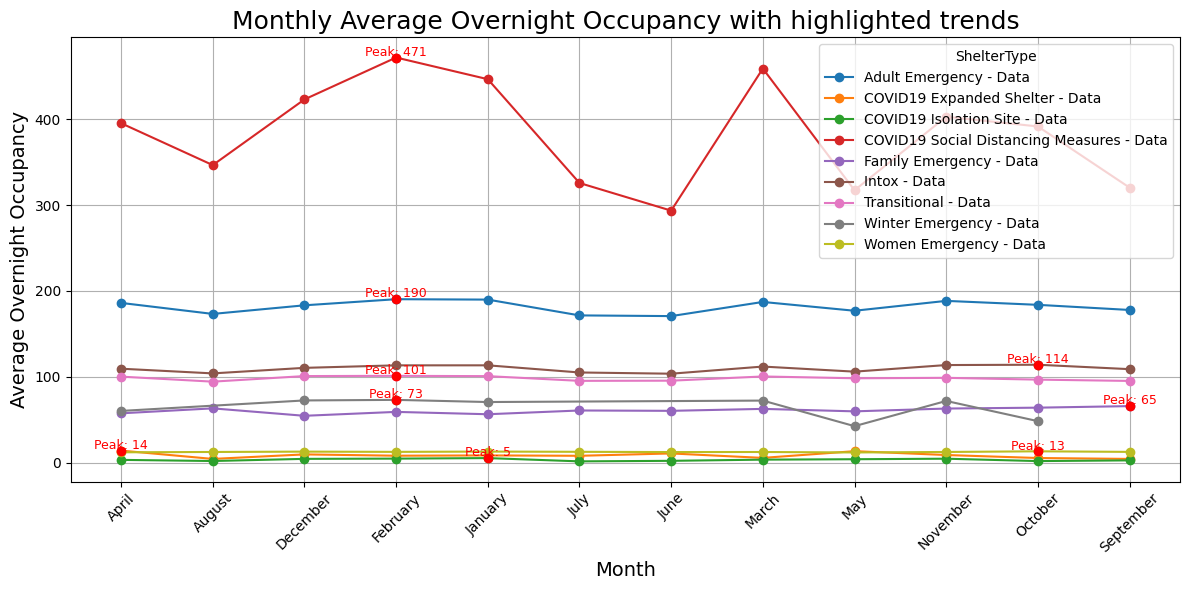

In [244]:
# To get monthly average Overnight occupancy
monthly_average_Overnight_occupancy = df.groupby(['ShelterType', 'Month'])['Overnight'].mean().reset_index()
#grouping by ShelterType first, then Month, creating seperate group for both
#calculating mean of Overnight to find the Overnight Occupancy
#resetting the index of the resulting DataFrame, making ShelterType and Month regular columns again.

plt.figure(figsize=(12, 6))

for shelter in monthly_average_Overnight_occupancy['ShelterType'].unique():
    shelter_data = monthly_average_Overnight_occupancy[monthly_average_Overnight_occupancy['ShelterType'] == shelter]
    plt.plot(shelter_data['Month'], shelter_data['Overnight'], marker='o', label=f'{shelter} - Data')
    #loop iterates through each unique shelter type found in the ShelterType column of the monthly_average_Overnight_occupancy DataFrame.
    #filtering data to select only rows using shelter_data
    # marker='o': Data points are marked with circles.
    #label=f'{shelter} - Data': label is assigned to the line for the legend.

    # Highlightimg peaks
    peak = shelter_data[shelter_data['Overnight'] == shelter_data['Overnight'].max()] #finding row with maximum Overnight value within the shelter_data

    # Checking if peak is not empty before accessing elements
    #If peak is not empty, then highlght it
    if not peak.empty:
        plt.scatter(peak['Month'], peak['Overnight'], color='red', zorder=5) #Adding red scatter at peak's month and occupancy value
        plt.text(peak['Month'].values[0], peak['Overnight'].values[0] + 2, #Adding text
                 f'Peak: {int(peak["Overnight"].values[0])}', color='red', fontsize=9, ha='center')


# Plotting with required parameters
plt.title('Monthly Average Overnight Occupancy with highlighted trends', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Overnight Occupancy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='ShelterType')
plt.tight_layout()

# Show plot
plt.show()


2. **Heatmap**:



1.  Create a heatmap showing the average occupancy by ShelterType and MONTH





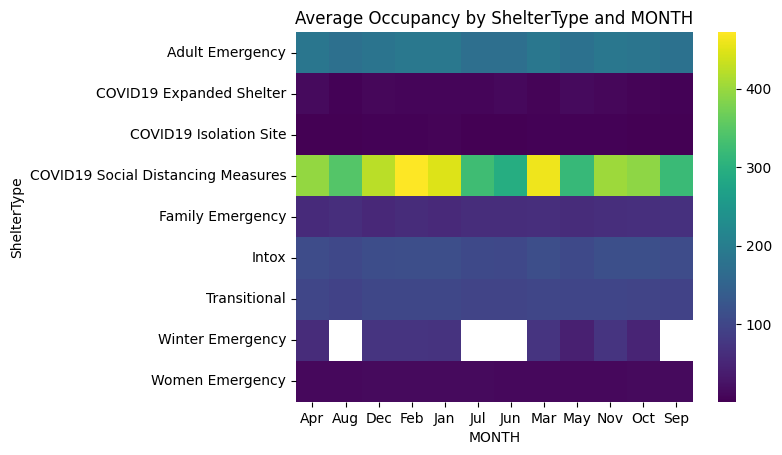

In [245]:
sns.heatmap(df.groupby(['ShelterType', 'MONTH'])['Overnight'].mean().unstack(), cbar=True, cmap='viridis')
# grouping by sheltertype and month , applying average on Overnighht column
# .unstack() to transform the data, ShelterType becomes the rows, MONTH becomes the columns, and the average occupancy values fill the cells of the heatmap.
#using seaborn library, cmap to speacify color scheme
plt.title('Average Occupancy by ShelterType and MONTH')
plt.show()

3. **Bar Charts:**



1.   Plot the total occupancy for each organization as a bar chart.
2.   Add annotations to indicate the exact totals for each organization.


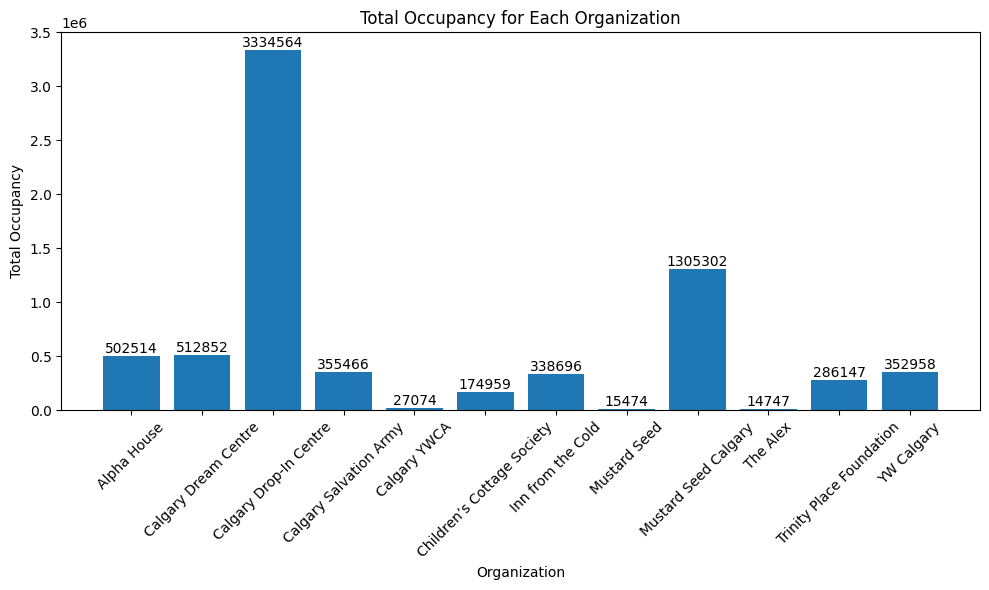

In [246]:
#To plot bar chart

Total_Occupancy = df.groupby('Organization')['Overnight'].sum()
# Grouping the data based on Organization, then calculating the sum on Overnight column values on each group and storing them in Total_Occupancy

plt.figure(figsize=(10, 6))
plt.bar(Total_Occupancy.index, Total_Occupancy.values)
plt.title('Total Occupancy for Each Organization')
plt.xlabel('Organization') #labelling X-axis
plt.ylabel('Total Occupancy') #Labelling Y-axis
plt.xticks(rotation=45) #rotating x axis for clarity
plt.tight_layout()

# Adding annotations
#iterating the loop through total occuoancy of each organization and using enumerate to get the i(index) and v(value) of each item in the loop
#i,v : positioning the annotation on x and y axis
#str(v) coverting the value to string
#ha and va for horizontal and vertical aligning
for i, v in enumerate(Total_Occupancy.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


4. **Box Plot:**



1.   Create a box plot for Overnight occupancy grouped by ShelterType.
2.   Highlight any noticeable patterns or anomalies



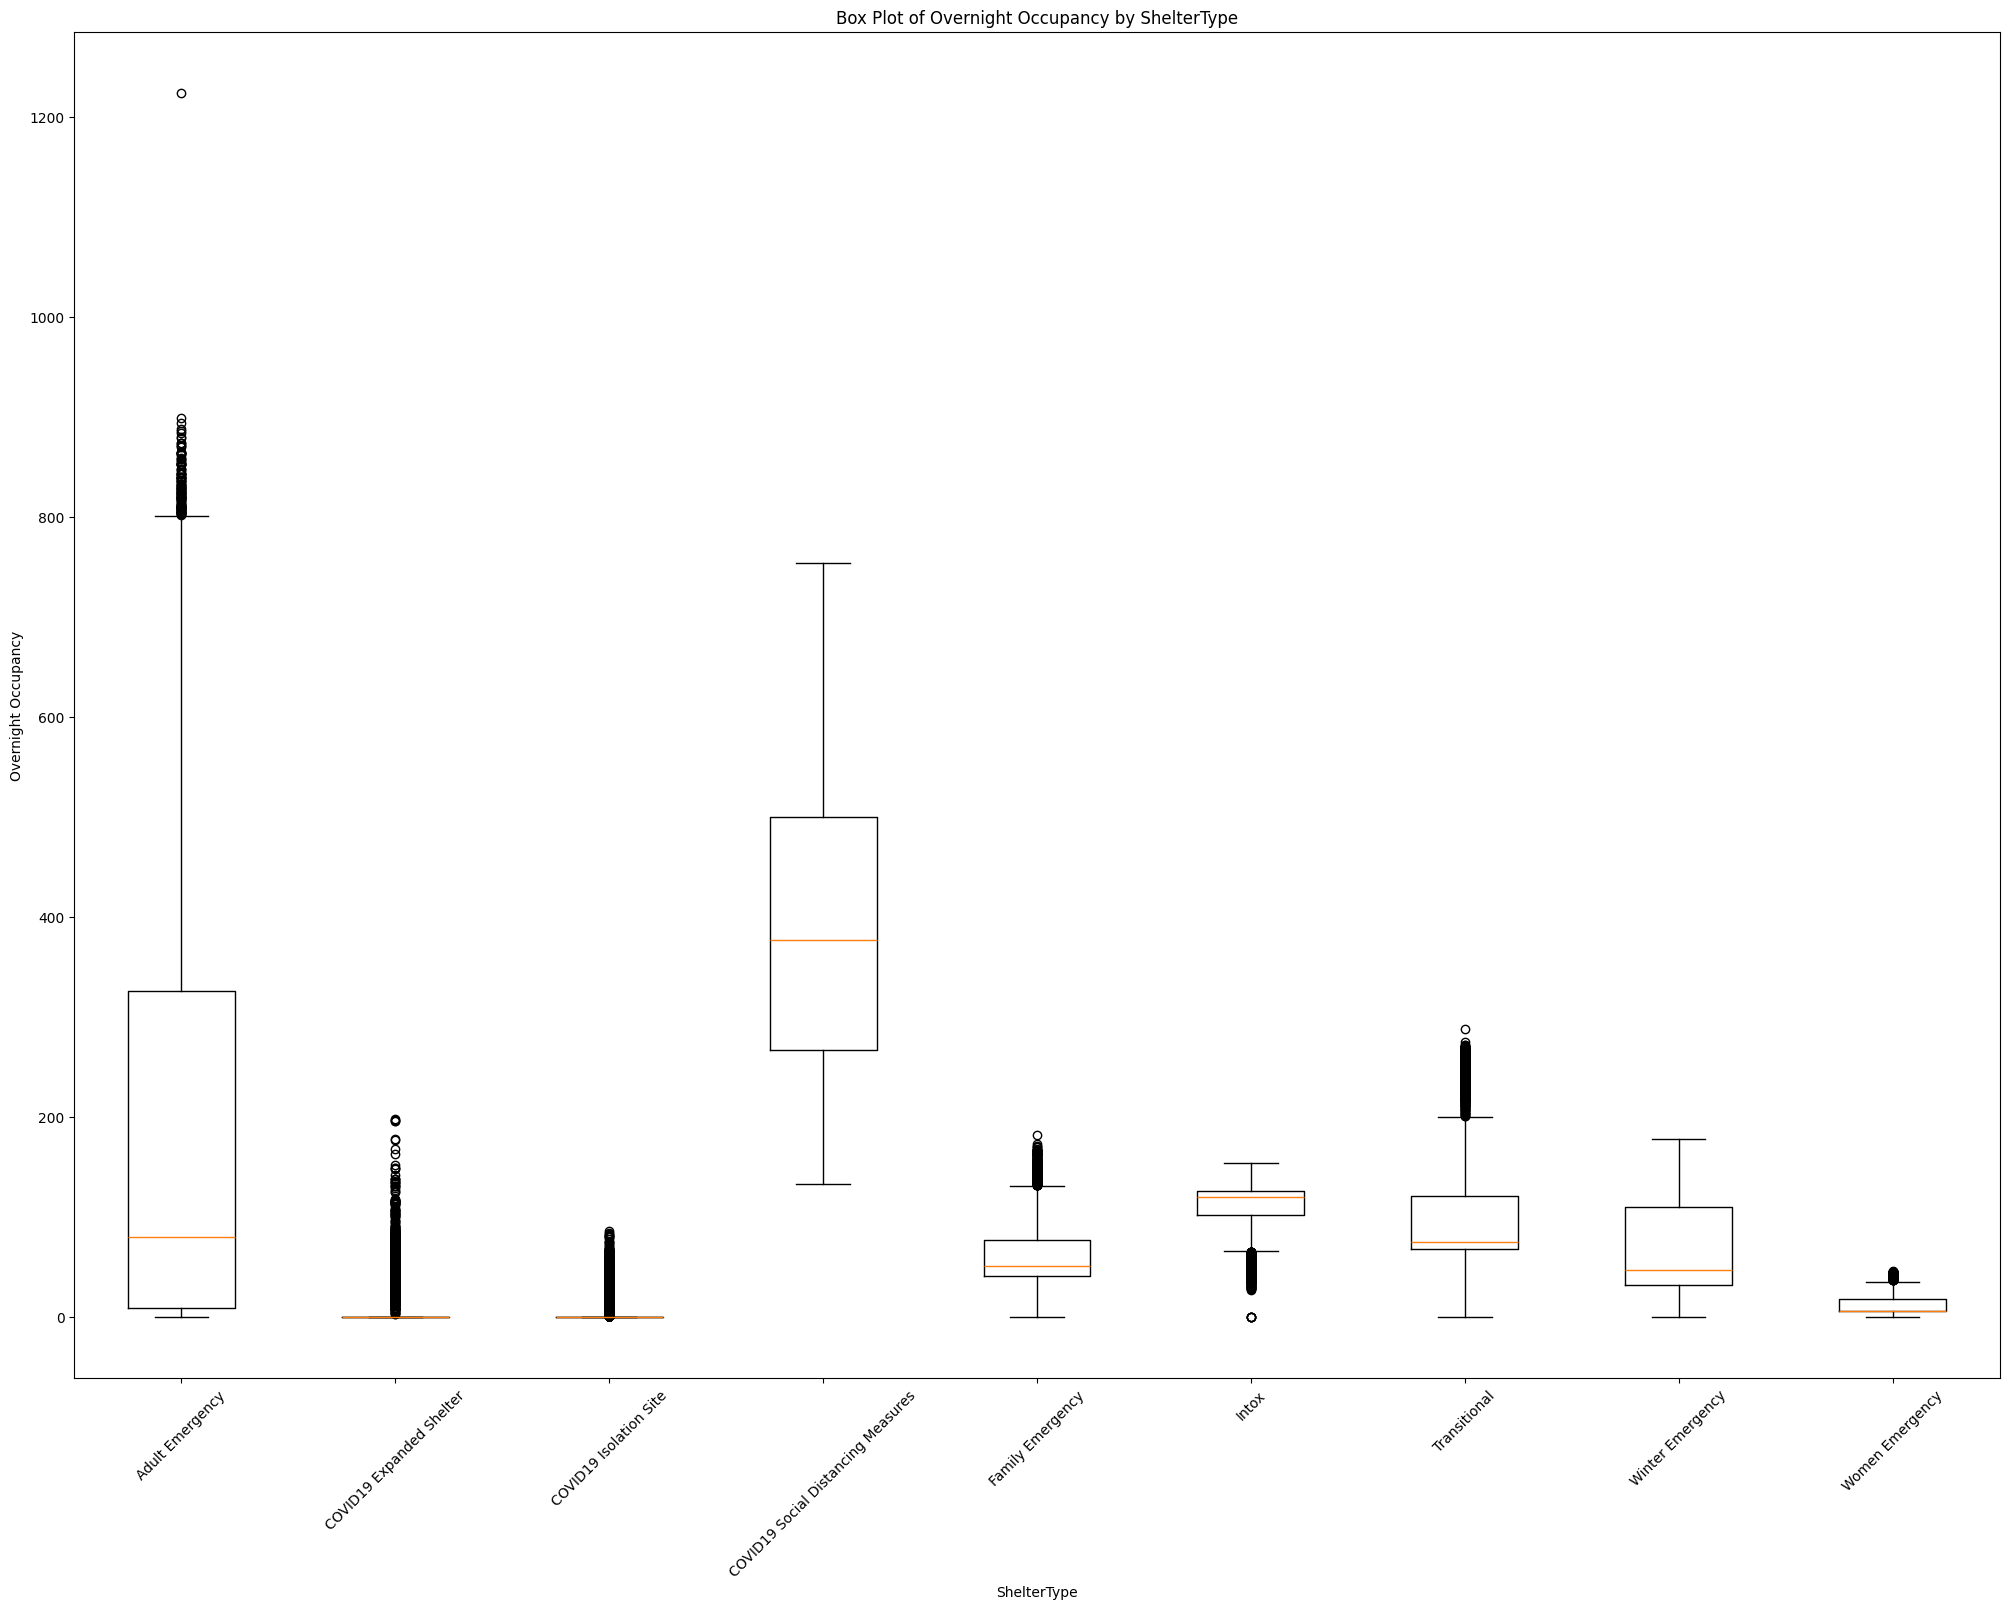

In [247]:
#Grouping by sheltertype, selecting Overnight column from each grooup ang summing the occupancy value for each group
Box_plot = df.groupby('ShelterType')['Overnight'].sum()
plt.figure(figsize=(20, 16)) #size of the plot
#iterating through each shelter type in n Box_plot.index
#Selecting Overnight Data points for each shelter type matching with current values
plt.boxplot([df[df['ShelterType'] == shelter]['Overnight'] for shelter in Box_plot.index], tick_labels=Box_plot.index)
plt.title('Box Plot of Overnight Occupancy by ShelterType')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('ShelterType')
plt.ylabel('Overnight Occupancy')
plt.show()


**Part 4:**

1. **Custom Functions:**



*   Write a custom function to dynamically impute missing values based on grouping
criteria (e.g., median capacity by ShelterType).



In [249]:
def Dynamic_func(df, by_column, On_column):
    # Impute missing values with the median of each group
    df[On_column] = df.groupby(by_column)[On_column].transform(lambda x: x.fillna(x.median()))
    #groups by the value of by_column and select the On_column to fill the values
    #fills missing values (x.fillna) using the median value (x.median()) within that group.
    #The transform method ensures the result is aligned with the original DataFrame.
    return df

print(Dynamic_func(df, 'ShelterType', 'Capacity'))



            Date  YEAR MONTH     City               ShelterType  \
0     2013-04-01  2013   Apr  Calgary           Adult Emergency   
1     2013-04-01  2013   Apr  Calgary          Winter Emergency   
2     2013-04-01  2013   Apr  Calgary              Transitional   
3     2013-04-01  2013   Apr  Calgary           Adult Emergency   
4     2013-04-01  2013   Apr  Calgary           Adult Emergency   
...          ...   ...   ...      ...                       ...   
76422 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76423 2024-10-31  2024   Oct  Calgary    COVID19 Isolation Site   
76424 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76425 2024-10-31  2024   Oct  Calgary  COVID19 Expanded Shelter   
76426 2024-10-31  2024   Oct  Calgary           Women Emergency   

                                ShelterName            Organization  \
0                               River Front  Calgary Drop-In Centre   
1            River Front - Winter Emergency  Calgary 

2. **Correlation and Hypothesis Testing:**



*   Calculate the correlation between Capacity and Overnight.
*   Perform a hypothesis test to determine if the average occupancy differs
significantly between two selected shelter types.




In [254]:
import pandas as pd
import scipy.stats as stats


#correlation between two columns in the dataset, Capacity and Overnight.
correlation = df['Capacity'].corr(df['Overnight'])
print(f"Correlation: {correlation:.2f}") #to print upto 2 decimal places

For_a = df[df['ShelterType'] == 'Sheltertype1']['Overnight'] #selects data for 'Sheltertype1' shelters and stores their 'Overnight' occupancy values in For_a
For_b = df[df['ShelterType'] == 'Sheltertype2']['Overnight'] #selects data for 'Sheltertype2' shelters and stores their 'Overnight' occupancy values in For_b

Mean1= For_a.mean() #calculating the mean of For_a
Mean2= For_b.mean() #calculating the mean of For_b
Var1= For_a.var() #calculating the variance of For_a
Var2= For_b.var() #calculating the variance of For_b
Samplesize1= For_a.count() #Calculating sample size
Samplesize2= For_b.count() #Calculating sample size

t_statistic = (Mean1-Mean2) / np.sqrt(Var1/Samplesize1 + Var2/Samplesize2) #calculating t-statistic using teh formula

degree_of_freedom= ((Var1/Samplesize1 + Var2/Samplesize2)**2) / ((Var1/Samplesize1)**2/(Samplesize1-1) + (Var2/Samplesize2)**2/(Samplesize2-1)) #calculating degrees of freedom using teh formula

p_value = 1 - stats.t.cdf(t_statistic, degree_of_freedom) #calculating p-value

#Applying the condition to determine  if the average occupancy differs significantly between two selected shelter types

if p_value < 0.05:
    print("The average occupancy is significantly different between Sheltertype1 and Sheltertype2.")
else:
    print("The average occupancy is not significantly different between Sheltertype1 and Sheltertype2.")








Correlation: 0.96
The average occupancy is not significantly different between Sheltertype1 and Sheltertype2.


3. **Joins**:




*  Create a DataFrame summarizing average occupancy for each organization.
*   Perform an inner join with the main dataset to analyze trends specific to the top 3
organizations.

In [255]:
#Grouping the data by Organization column
#Calculating average of Overnight values
#resettng the index of resulting Dataframe, to make organization a regular column again

Average_Occupancy_by_Organization = df.groupby('Organization')['Overnight'].mean().reset_index()
Average_Occupancy_by_Organization.columns = ['Organization', 'Average_Overnight_Occupancy'] #renaming the columns to Organization and Average_Overnight_Occupancy
print("\nDataFrame summarizing average occupancy for each organization:")
print(Average_Occupancy_by_Organization)


Top_3_Organizations = Average_Occupancy_by_Organization.nlargest(3, 'Average_Overnight_Occupancy') #Using the .nlargest to select top 3 rows based on highest value of Average_Overnight_Occupancy
print("\nTop 3 Organizations based on average occupancy:")
print(Top_3_Organizations)



DataFrame summarizing average occupancy for each organization:
                  Organization  Average_Overnight_Occupancy
0                  Alpha House                    40.968042
1         Calgary Dream Centre                   121.212952
2       Calgary Drop-In Centre                   166.719864
3       Calgary Salvation Army                    42.007327
4                 Calgary YWCA                    35.859603
5   Children’s Cottage Society                    41.351690
6            Inn from the Cold                    80.051052
7                 Mustard Seed                    38.977330
8         Mustard Seed Calgary                   168.187347
9                     The Alex                    10.305381
10    Trinity Place Foundation                    67.647045
11                  YW Calgary                    41.864310

Top 3 Organizations based on average occupancy:
             Organization  Average_Overnight_Occupancy
8    Mustard Seed Calgary                   168.1873

# **Bonus Task**
Analyze the impact of weekend vs. weekday occupancy on shelter utilization

Average Occupancy on Weekdays: 94.75
Average Occupancy on Weekends: 93.79


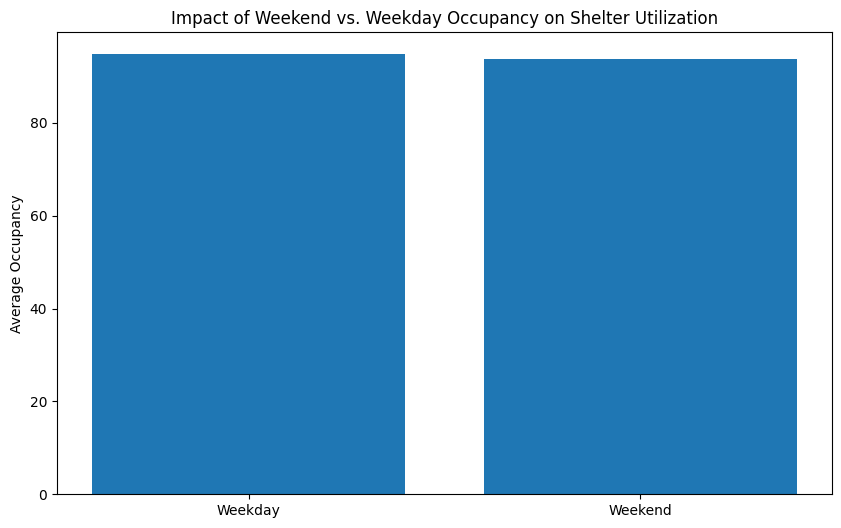

In [258]:
#creating a new column 'Is_Weekend' on the dataframe
#Usingdt.dayofweek to get the days of the week in to numbetr format where 0 is monday and 6 is sunday


df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5

#Making sure to select rows which result false for Is_Weekend and calculating. mean of Overnight values
Weekday_Occupancy = df[~df['Is_Weekend']]['Overnight'].mean()
#Making sure to select rows which result true for Is_Weekend and calculating. mean of Overnight values

Weekend_Occupancy = df[df['Is_Weekend']]['Overnight'].mean()
print(f"Average Occupancy on Weekdays: {Weekday_Occupancy:.2f}")
print(f"Average Occupancy on Weekends: {Weekend_Occupancy:.2f}")

#Specifying parameters to plot
plt.figure(figsize=(10, 6))
plt.bar(['Weekday', 'Weekend'], [Weekday_Occupancy, Weekend_Occupancy])
plt.title('Impact of Weekend vs. Weekday Occupancy on Shelter Utilization')
plt.ylabel('Average Occupancy')
plt.show()


Develop a simple regression model using NumPy to predict Overnight occupancy based
on Capacity, ShelterType, and MONTH

In [259]:
#Converting text labels for different shelter types into numerical codes
#using cat.codes to assign a unique integer to each shelter typ

df['ShelterType'] = df['ShelterType'].astype('category').cat.codes
df['MONTH'] = df['MONTH'].astype('category').cat.codes
#dropping missing values, if any
df = df.dropna(subset=['Capacity', 'Overnight', 'ShelterType', 'MONTH'])

#creating matrix for regression model
#creating acolumn of ones , electing value from all mentioned columns
#concatenates column of ones with others
X = np.c_[np.ones(len(df)), df[['Capacity', 'ShelterType', 'MONTH']].values]
y = df['Overnight'].values #creating target varaiable y

# Computing Regression coefficients
beta = np.linalg.lstsq(X, y, rcond=None)[0] #regression calculation using least square method
print(dict(zip(['Intercept','Capacity', 'ShelterType','MONTH'], beta))) #dict to give clear format. zip to combine name and beta types

{'Intercept': 4.5539452596478265, 'Capacity': 0.7112204604637775, 'ShelterType': 1.1019305847974386, 'MONTH': 0.012918144322231817}


Use Matplotlib to create a subplot grid showcasing trends for each ShelterType over the
years.




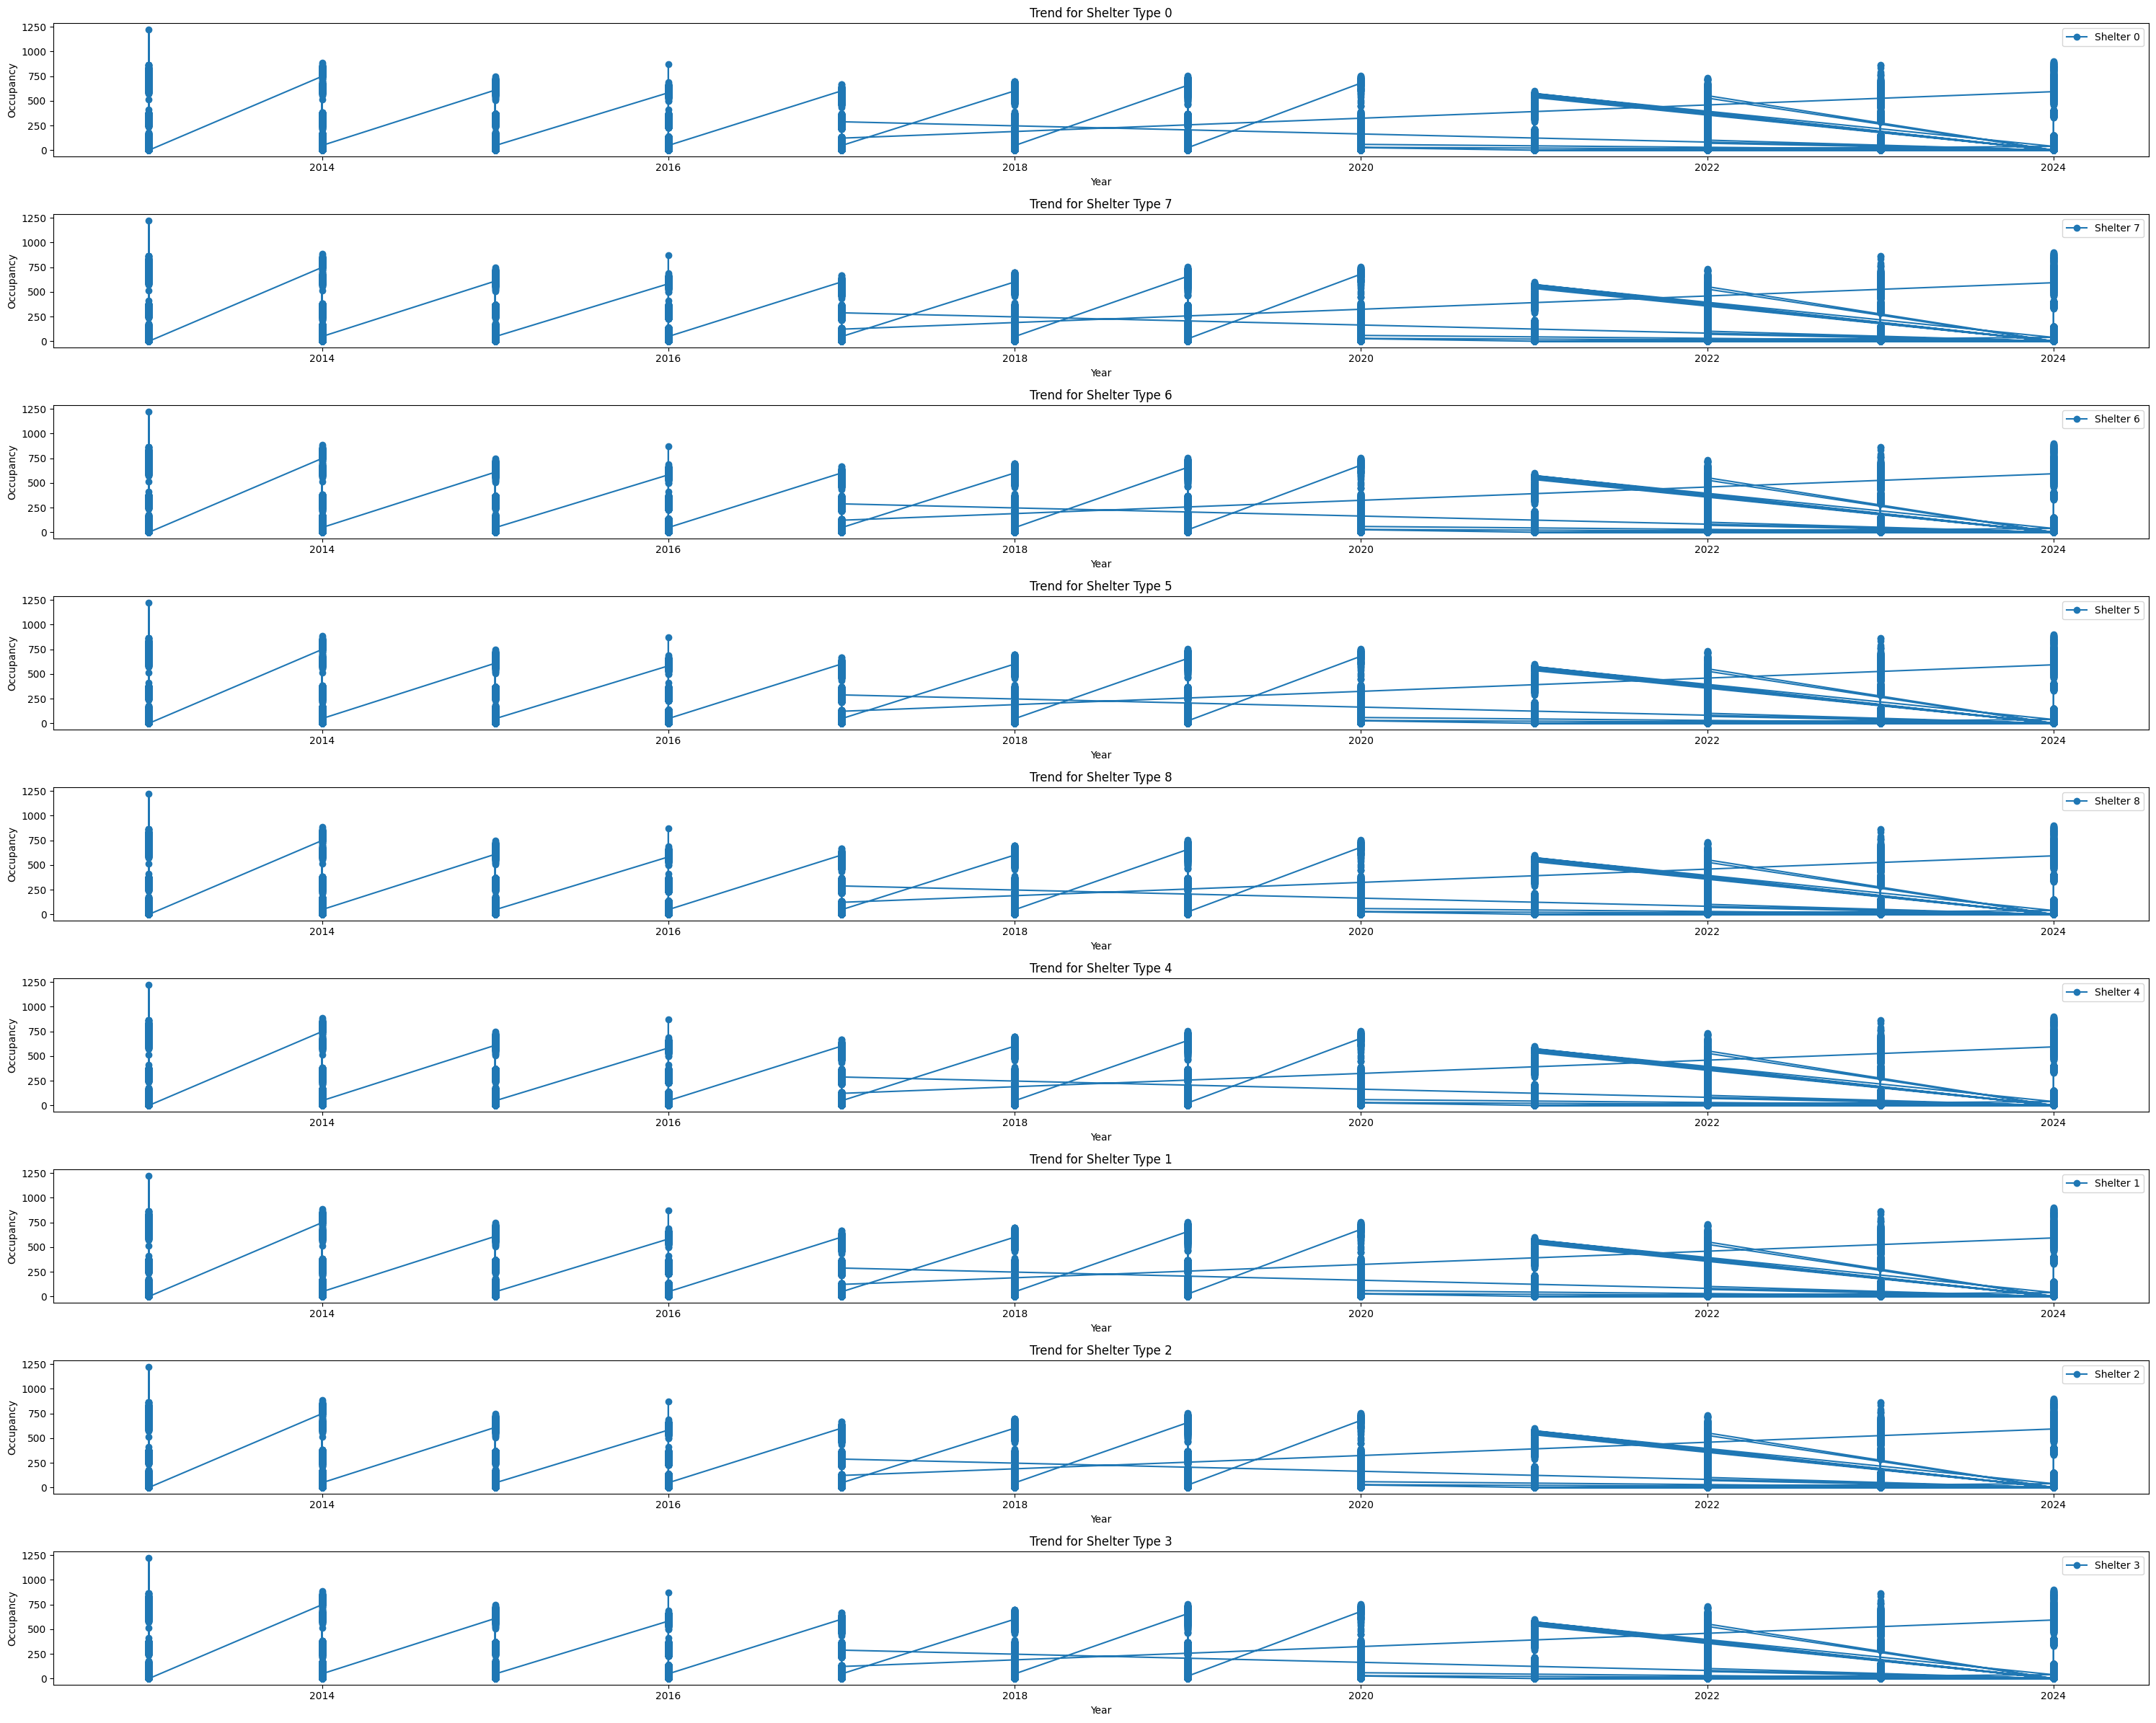

In [260]:
#getting all unique shleter type in the ShelterType column and storing in Shelter_types
shelter_types = df['ShelterType'].unique()

fig, axes = plt.subplots(nrows=len(shelter_types), ncols=1, figsize=(30, 24)) #subplotting using fig and axes, specifying number of rows , columns and size of the figure

#to ensure that if there is only one shelter type, it returns only one axes
if len(shelter_types) == 1:
    axes = [axes]
#iterating through each subplot (ax) in respect to shelter_types

for ax, shelter_type in zip(axes, shelter_types):
    Current_Shelter_type = df[df['ShelterType'] == shelter_type] #to select data from only current shelter_type
    ax.plot(df['YEAR'], df['Overnight'], marker='o', label=f'Shelter {shelter_type}')
    ax.set_title(f'Trend for Shelter Type {shelter_type}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Occupancy')
    ax.legend()

plt.tight_layout()
plt.show()